# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger (make output pretty)
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&q={city}&units={units}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | pindobacu
Processing Record 3 of Set 1 | adam
Processing Record 4 of Set 1 | arish
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | troitsko-pechorsk
Processing Record 7 of Set 1 | kingston
Processing Record 8 of Set 1 | vorgashor
Processing Record 9 of Set 1 | whitehorse
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | leh
Processing Record 12 of Set 1 | cannonvale
Processing Record 13 of Set 1 | polyarnyy
Processing Record 14 of Set 1 | port mathurin
Processing Record 15 of Set 1 | brokopondo
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | college
Processing Record 19 of Set 1 | taroa
Processing Record 20 of Set 1 | zhalantun
Processing Record 21 of Set 1 | viedma
Processing Record 22 of Set 1 | zabid
Processing Record 23 of Set 1 | puer

Processing Record 39 of Set 4 | yangor
City not found. Skipping...
Processing Record 40 of Set 4 | manaure
Processing Record 41 of Set 4 | usinsk
Processing Record 42 of Set 4 | sen monorom
Processing Record 43 of Set 4 | maragogi
Processing Record 44 of Set 4 | murray bridge
Processing Record 45 of Set 4 | trincomalee
Processing Record 46 of Set 4 | queenstown
Processing Record 47 of Set 4 | talara
Processing Record 48 of Set 4 | puerto maldonado
Processing Record 49 of Set 4 | armacao de buzios
Processing Record 0 of Set 5 | port lincoln
Processing Record 1 of Set 5 | steamboat springs
Processing Record 2 of Set 5 | port macquarie
Processing Record 3 of Set 5 | huarmey
Processing Record 4 of Set 5 | box elder
Processing Record 5 of Set 5 | ouarzazat
Processing Record 6 of Set 5 | weno
Processing Record 7 of Set 5 | edd
Processing Record 8 of Set 5 | hotan
Processing Record 9 of Set 5 | colby
Processing Record 10 of Set 5 | khandyga
Processing Record 11 of Set 5 | paracuru
Processing 

Processing Record 30 of Set 8 | carrigaline
Processing Record 31 of Set 8 | omdurman
Processing Record 32 of Set 8 | antsiranana
Processing Record 33 of Set 8 | kapa'a
Processing Record 34 of Set 8 | havre
Processing Record 35 of Set 8 | kansanshi
Processing Record 36 of Set 8 | novaya ladoga
Processing Record 37 of Set 8 | lebu
Processing Record 38 of Set 8 | saint-mandrier-sur-mer
Processing Record 39 of Set 8 | qaqortoq
Processing Record 40 of Set 8 | beloyarskiy
Processing Record 41 of Set 8 | suva
Processing Record 42 of Set 8 | mezhdurechenskiy
Processing Record 43 of Set 8 | sonoita
Processing Record 44 of Set 8 | smara
Processing Record 45 of Set 8 | severo-yeniseyskiy
Processing Record 46 of Set 8 | mossel bay
Processing Record 47 of Set 8 | tayshet
Processing Record 48 of Set 8 | mount isa
Processing Record 49 of Set 8 | montepuez
Processing Record 0 of Set 9 | ust'-ilimsk
Processing Record 1 of Set 9 | puerto san carlos
City not found. Skipping...
Processing Record 2 of Set 

Processing Record 18 of Set 12 | cestos city
Processing Record 19 of Set 12 | petropavlovka
Processing Record 20 of Set 12 | badamdar
Processing Record 21 of Set 12 | kavaratti
Processing Record 22 of Set 12 | toga village
City not found. Skipping...
Processing Record 23 of Set 12 | talcahuano
Processing Record 24 of Set 12 | diyarbakir
Processing Record 25 of Set 12 | gambela
Processing Record 26 of Set 12 | xinqing
Processing Record 27 of Set 12 | tosontsengel
Processing Record 28 of Set 12 | tibanbang
Processing Record 29 of Set 12 | medenine
Processing Record 30 of Set 12 | roma
Processing Record 31 of Set 12 | al jawf
Processing Record 32 of Set 12 | oum hadjer
Processing Record 33 of Set 12 | vilhena
Processing Record 34 of Set 12 | poronaysk
Processing Record 35 of Set 12 | tchaourou
Processing Record 36 of Set 12 | qacha's nek
Processing Record 37 of Set 12 | yulinshi
Processing Record 38 of Set 12 | kruisfontein
Processing Record 39 of Set 12 | santiago de cao
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,7.59,45,17,0.45,US,1707416815
1,pindobacu,-10.7417,-40.3608,33.07,35,97,1.05,BR,1707416834
2,adam,22.3756,57.5233,19.86,33,92,4.66,OM,1707416834
3,arish,31.1316,33.7984,17.06,69,56,2.51,EG,1707416835
4,adamstown,-25.0660,-130.1015,23.83,91,100,12.47,PN,1707416633


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,7.59,45,17,0.45,US,1707416815
1,pindobacu,-10.7417,-40.3608,33.07,35,97,1.05,BR,1707416834
2,adam,22.3756,57.5233,19.86,33,92,4.66,OM,1707416834
3,arish,31.1316,33.7984,17.06,69,56,2.51,EG,1707416835
4,adamstown,-25.0660,-130.1015,23.83,91,100,12.47,PN,1707416633


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

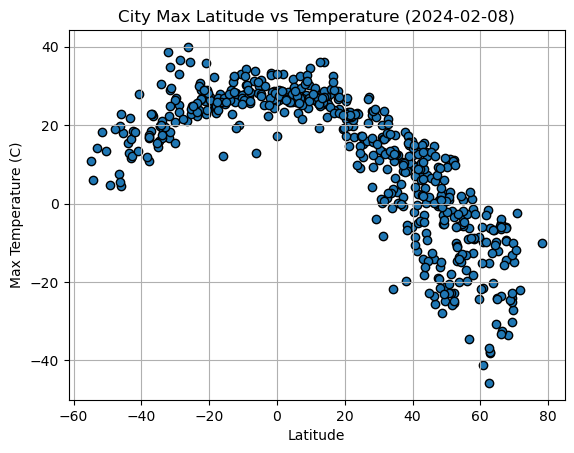

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'],
            edgecolor='black')

# Incorporate the other graph properties
# Add datetime dependency to create date format for graph title (Y-M-D)
sel_date = datetime.now().strftime("%Y-%m-%d")
plt.title(f'City Max Latitude vs Temperature ({sel_date})')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.grid(True)
plt.tight_layout

# Save the figure
plt.savefig("output_data/Temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

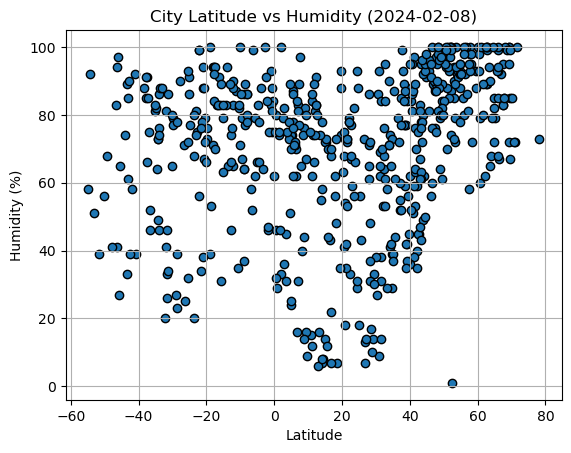

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'],
            edgecolor='black')

# Incorporate the other graph properties
sel_date = datetime.now().strftime("%Y-%m-%d")
plt.title(f'City Latitude vs Humidity ({sel_date})')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)
plt.tight_layout

# Save the figure
plt.savefig("output_data/Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

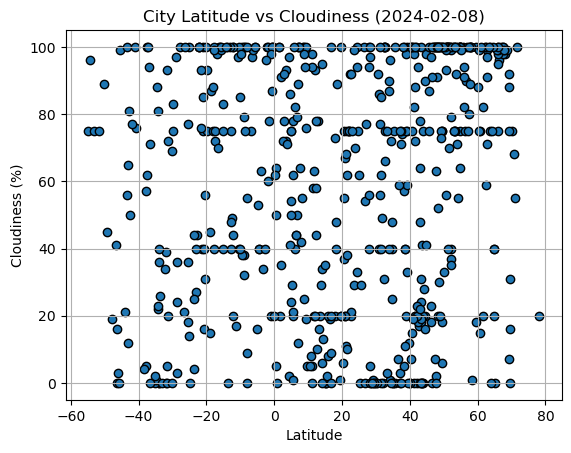

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'],
            edgecolor='black')

# Incorporate the other graph properties
sel_date = datetime.now().strftime("%Y-%m-%d")
plt.title(f'City Latitude vs Cloudiness ({sel_date})')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)
plt.tight_layout

# Save the figure
plt.savefig("output_data/Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

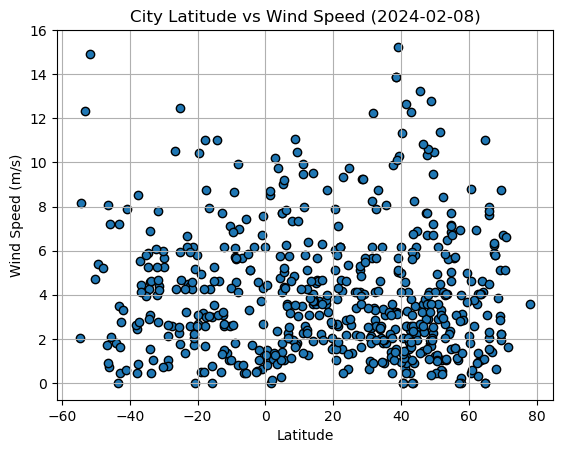

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'],
            edgecolor='black')

# Incorporate the other graph properties
sel_date = datetime.now().strftime("%Y-%m-%d")
plt.title(f'City Latitude vs Wind Speed ({sel_date})')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid(True)
plt.tight_layout


# Save the figure
plt.savefig("output_data/WindSpeed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# x_value = <desired x axis>
# y_value = <desired y axis>
## Help from ChatGPT
# slope = linregress(x_value, y_value)
# (slope, intercept, r_value, pvalue, stderr) = linregress(x_value, y_value)
# y_pred = slope * x_value + intercept
# linear_regression_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,7.59,45,17,0.45,US,1707416815
2,adam,22.3756,57.5233,19.86,33,92,4.66,OM,1707416834
3,arish,31.1316,33.7984,17.06,69,56,2.51,EG,1707416835
5,troitsko-pechorsk,62.7084,56.1964,-6.28,89,99,4.02,RU,1707416835
6,kingston,17.9970,-76.7936,26.57,62,20,3.60,JM,1707416744


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,pindobacu,-10.7417,-40.3608,33.07,35,97,1.05,BR,1707416834
4,adamstown,-25.0660,-130.1015,23.83,91,100,12.47,PN,1707416633
9,margaret river,-33.9500,115.0667,20.96,46,0,4.56,AU,1707416835
11,cannonvale,-20.2833,148.7000,27.66,79,56,5.78,AU,1707416836
13,port mathurin,-19.6833,63.4167,27.08,76,93,10.44,MU,1707416836


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8561627168721438


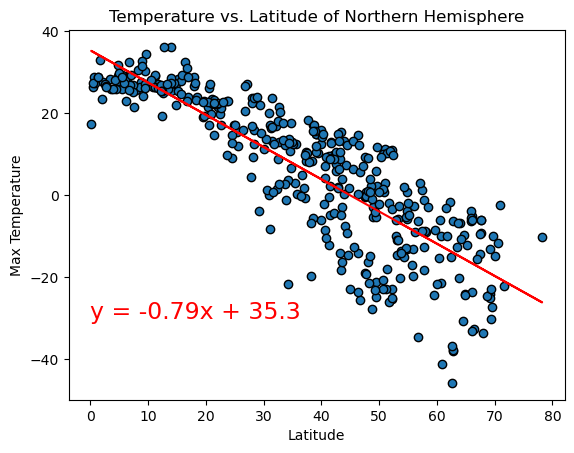

In [15]:
# Setting up linear regression 
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Max Temp']

# This will always be the same for making the linear regression graphs
slope = linregress(x_value, y_value)
(slope, intercept, r_value, pvalue, stderr) = linregress(x_value, y_value)
y_pred = slope * x_value + intercept
linear_regression_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Linear regression on Northern Hemisphere
plt.ylabel('Max Temperature')
plt.xlabel('Latitude')
plt.title('Temperature vs. Latitude of Northern Hemisphere')
plt.scatter(x_value, y_value, 
            edgecolor='black')
plt.plot(x_value, y_pred, 
         color = 'red')
plt.annotate(linear_regression_eq,
             (0, -30),
             color = 'red', 
             fontsize = 17)
print(f'The r-value is: {r_value}')
plt.savefig("output_data/temp_NH.png")



**Discussion about the linear relationship:** 
Based off the rvalue (-0.856) there appears to be a very strong negative relationship between the maximum temperature and latitude of the northern hemisphere. As the latitude in the northern hemisphere increases (gets further from the equator) the maximum temperature decreases.

The r-value is: 0.6508020910408712


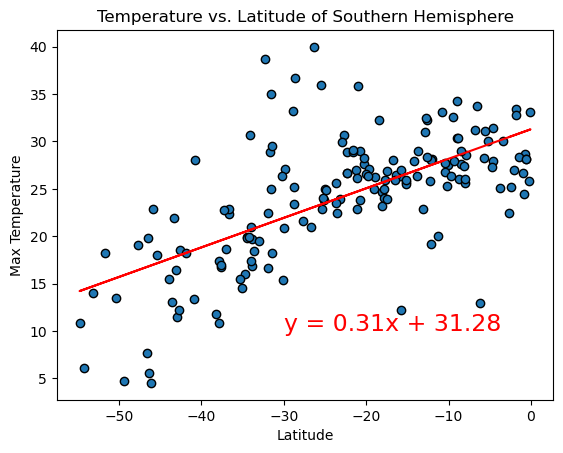

In [16]:
# Setting up linear regression 
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Max Temp']

# This will always be the same for making the linear regression graphs
slope = linregress(x_value, y_value)
(slope, intercept, r_value, pvalue, stderr) = linregress(x_value, y_value)
y_pred = slope * x_value + intercept
linear_regression_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Linear regression on Southern Hemisphere
plt.ylabel('Max Temperature')
plt.xlabel('Latitude')
plt.title('Temperature vs. Latitude of Southern Hemisphere')
plt.scatter(x_value, y_value, 
            edgecolor='black')
plt.plot(x_value, y_pred, 
         color = 'red')
plt.annotate(linear_regression_eq,
             (-30, 10),
             color = 'red', 
             fontsize = 17)
print(f'The r-value is: {r_value}')
plt.savefig("output_data/temp_SH.png")



**Discussion about the linear relationship:** 
Based off the rvalue (0.650) there appears to be a moderate positive relationship between the maximum temperature and latitude of the southern hemisphere. As the latitude in the southern hemisphere increases (moves closer to the equator) the maximum temperature slightly increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.46281404243420754


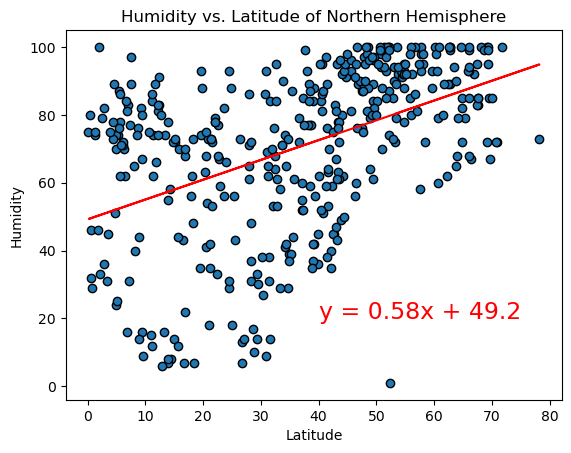

In [17]:
# Setting up linear regression 
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Humidity']

# This will always be the same for making the linear regression graphs
slope = linregress(x_value, y_value)
(slope, intercept, r_value, pvalue, stderr) = linregress(x_value, y_value)
y_pred = slope * x_value + intercept
linear_regression_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Linear regression on Northern Hemisphere
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title('Humidity vs. Latitude of Northern Hemisphere')
plt.scatter(x_value, y_value, 
            edgecolor='black')
plt.plot(x_value, y_pred, 
         color = 'red')
plt.annotate(linear_regression_eq,
             (40, 20),
             color = 'red', 
             fontsize = 17)
print(f'The r-value is: {r_value}')
plt.savefig("output_data/humdity_NH.png")


**Discussion about the linear relationship:** 
Based off the rvalue (0.462) there appears to be a weak positive relationship between the humidity and latitude of the northern hemisphere. As the latitude in the northern hemisphere increases the humidity increases. 

The r-value is: 0.21440872134638053


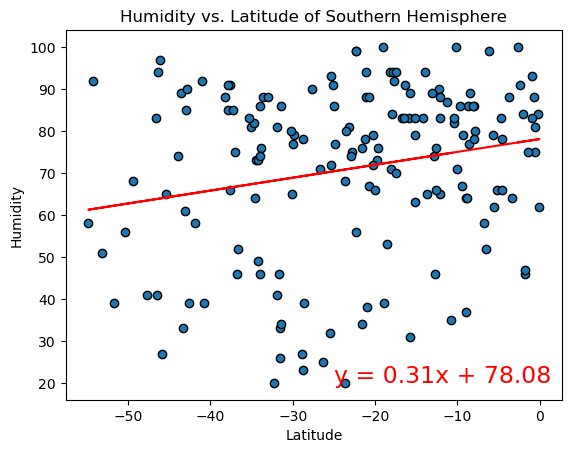

In [18]:
# Setting up linear regression 
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Humidity']

# This will always be the same for making the linear regression graphs
slope = linregress(x_value, y_value)
(slope, intercept, r_value, pvalue, stderr) = linregress(x_value, y_value)
y_pred = slope * x_value + intercept
linear_regression_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Linear regression on Southern Hemisphere
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title('Humidity vs. Latitude of Southern Hemisphere')
plt.scatter(x_value, y_value, 
            edgecolor='black')
plt.plot(x_value, y_pred, 
         color = 'red')
plt.annotate(linear_regression_eq,
             (-25, 20),
             color = 'red', 
             fontsize = 17)
print(f'The r-value is: {r_value}')
plt.savefig("output_data/humdity_SH.png")

**Discussion about the linear relationship:** The points on the plot are very scattered which indicate that there may not be much of a correlation between humidity and latitude. Based off the rvalue (0.214) there appears to be a very weak positive relationship between the humidity and latitude of the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2474077328091624


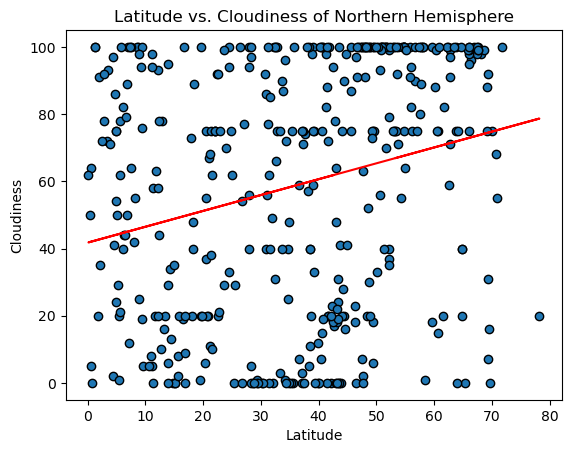

In [19]:
# Setting up linear regression 
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Cloudiness']

# This will always be the same for making the linear regression graphs
slope = linregress(x_value, y_value)
(slope, intercept, r_value, pvalue, stderr) = linregress(x_value, y_value)
y_pred = slope * x_value + intercept
linear_regression_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Linear regression on Northern Hemisphere
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title('Latitude vs. Cloudiness of Northern Hemisphere')
plt.scatter(x_value, y_value, 
            edgecolor='black')
plt.plot(x_value, y_pred, 
         color = 'red')
plt.annotate(linear_regression_eq,
             (-25, 20),
             color = 'red', 
             fontsize = 17)
print(f'The r-value is: {r_value}')
plt.savefig("output_data/cloudiness_NH.png")

**Discussion about the linear relationship:** Although looking at the datapoints there does not appear to be a clear linear relationship between the cloudniess and latitude of the northern hemisphere, based off of the rvalue (0.247) there is a weak positive correlation between the two variables. As that latitude increases (gets further from the equator) the cloudiness appears to increase. 

The r-value is: 0.24314774972473008


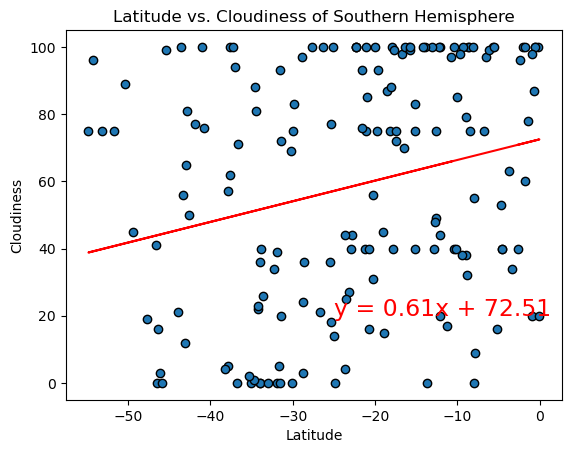

In [20]:
# Setting up linear regression 
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Cloudiness']

# This will always be the same for making the linear regression graphs
slope = linregress(x_value, y_value)
(slope, intercept, r_value, pvalue, stderr) = linregress(x_value, y_value)
y_pred = slope * x_value + intercept
linear_regression_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Linear regression on Southern Hemisphere
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title('Latitude vs. Cloudiness of Southern Hemisphere')
plt.scatter(x_value, y_value, 
            edgecolor='black')
plt.plot(x_value, y_pred, 
         color = 'red')
plt.annotate(linear_regression_eq,
             (-25, 20),
             color = 'red', 
             fontsize = 17)
print(f'The r-value is: {r_value}')
plt.savefig("output_data/cloudiness_SH.png")

**Discussion about the linear relationship:** Although looking at the datapoints there does not appear to be a clear linear relationship between the cloudniess and latitude of the southern hemisphere, based off of the r-value (0.243) is a very weak positive correlation between the two varaibles. As that latitude increases (gets closer to the equator) the cloudiness appears to increase. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.049316600419616455


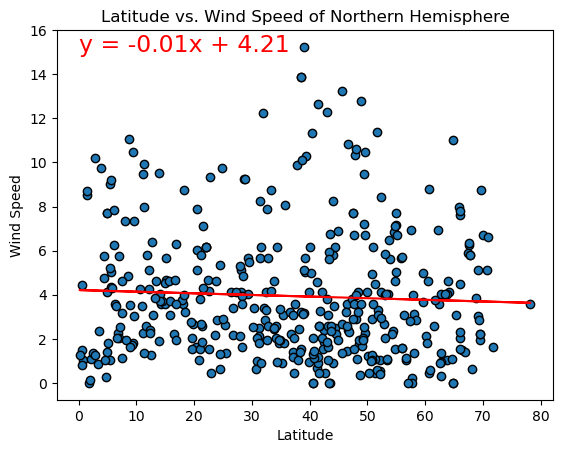

In [21]:
# Setting up linear regression 
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Wind Speed']

# This will always be the same for making the linear regression graphs
slope = linregress(x_value, y_value)
(slope, intercept, r_value, pvalue, stderr) = linregress(x_value, y_value)
y_pred = slope * x_value + intercept
linear_regression_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Linear regression on Northern Hemisphere
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title('Latitude vs. Wind Speed of Northern Hemisphere')
plt.scatter(x_value, y_value, 
            edgecolor='black')
plt.plot(x_value, y_pred, 
         color = 'red')
plt.annotate(linear_regression_eq,
             (0, 15),
             color = 'red', 
             fontsize = 17)
print(f'The r-value is: {r_value}')
plt.savefig("output_data/wind_NH.png")

**Discussion about the linear relationship:** Based off of the r-value (-0.049) there appears to be no corrlation between the two variables. As that latitude increases (gets further from the equator) the windspeeds appear to slightly decrease. 

The r-value is: -0.07796034375763994


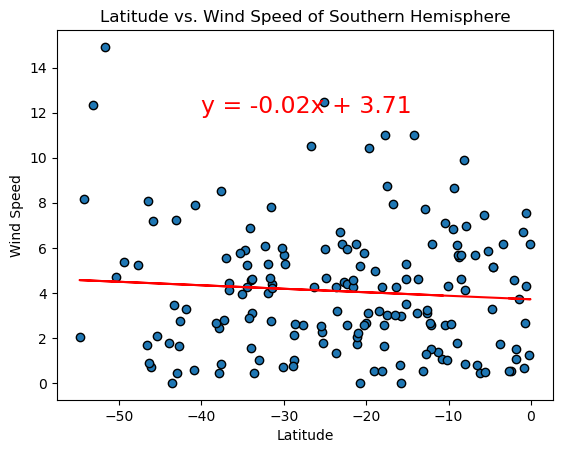

In [22]:
# Setting up linear regression 
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Wind Speed']

# This will always be the same for making the linear regression graphs
slope = linregress(x_value, y_value)
(slope, intercept, r_value, pvalue, stderr) = linregress(x_value, y_value)
y_pred = slope * x_value + intercept
linear_regression_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Linear regression on Southern Hemisphere
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title('Latitude vs. Wind Speed of Southern Hemisphere')
plt.scatter(x_value, y_value, 
            edgecolor='black')
plt.plot(x_value, y_pred, 
         color = 'red')
plt.annotate(linear_regression_eq,
             (-40, 12),
             color = 'red', 
             fontsize = 17)
print(f'The r-value is: {r_value}')
plt.savefig("output_data/wind_SH.png")

**Discussion about the linear relationship:** Based off of the r-value (-0.077) there appears to be no correlation or a very very very weak negative correlation between the two varaibles. As that latitude increases (gets closer to the equator) the windspeeds appear to slightly decrease. 